In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2024-04-03 12:22:26.534542: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 12:22:26.534600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 12:22:26.534617: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 12:22:26.541174: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


In [2]:
%rm -rf ./logs
%load_ext tensorboard
log_dir = "logs/tut_1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0

test_images = test_images / 255.0

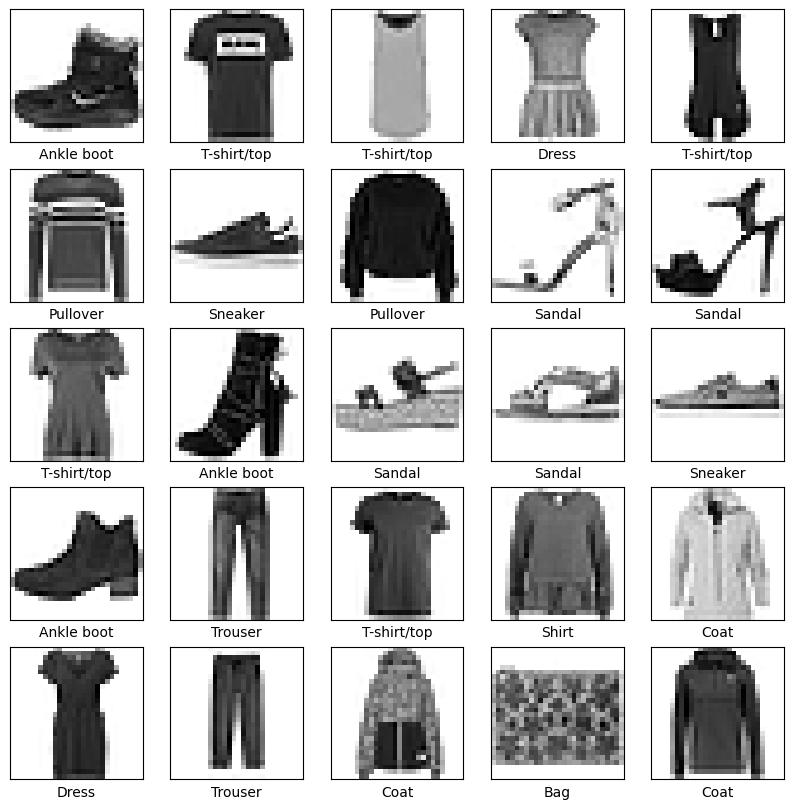

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2024-04-03 12:22:30.498480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-03 12:22:30.504321: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-03 12:22:30.504386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-03 12:22:30.507952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-03 12:22:30.507989: I tensorflow/compile

In [6]:
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

2024-04-03 12:22:36.460138: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-04-03 12:22:38.538637: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2024-04-03 12:22:39.489547: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f813072c2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-03 12:22:39.489589: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-04-03 12:22:39.495675: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-03 12:22:39.518461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-04-03 12:22:39.573366: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5002 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3769 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3378 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2951 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2684 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2497 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2412 - accurac

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3274 - accuracy: 0.8826 - 885ms/epoch - 3ms/step

Test accuracy: 0.8826000094413757


In [8]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
class_names[np.argmax(predictions[0])]

313/313 [==============================] - 0s 1ms/step


'Ankle boot'

In [9]:
class_names[test_labels[0]]

'Ankle boot'

In [10]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

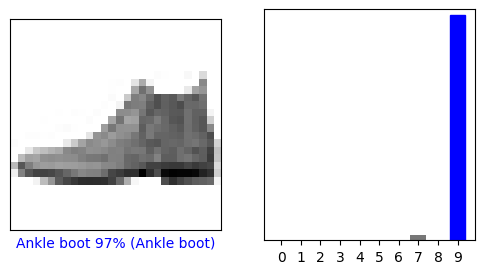

In [11]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

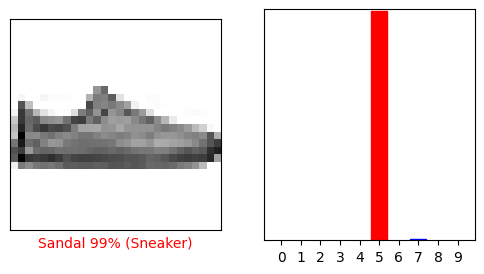

In [12]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

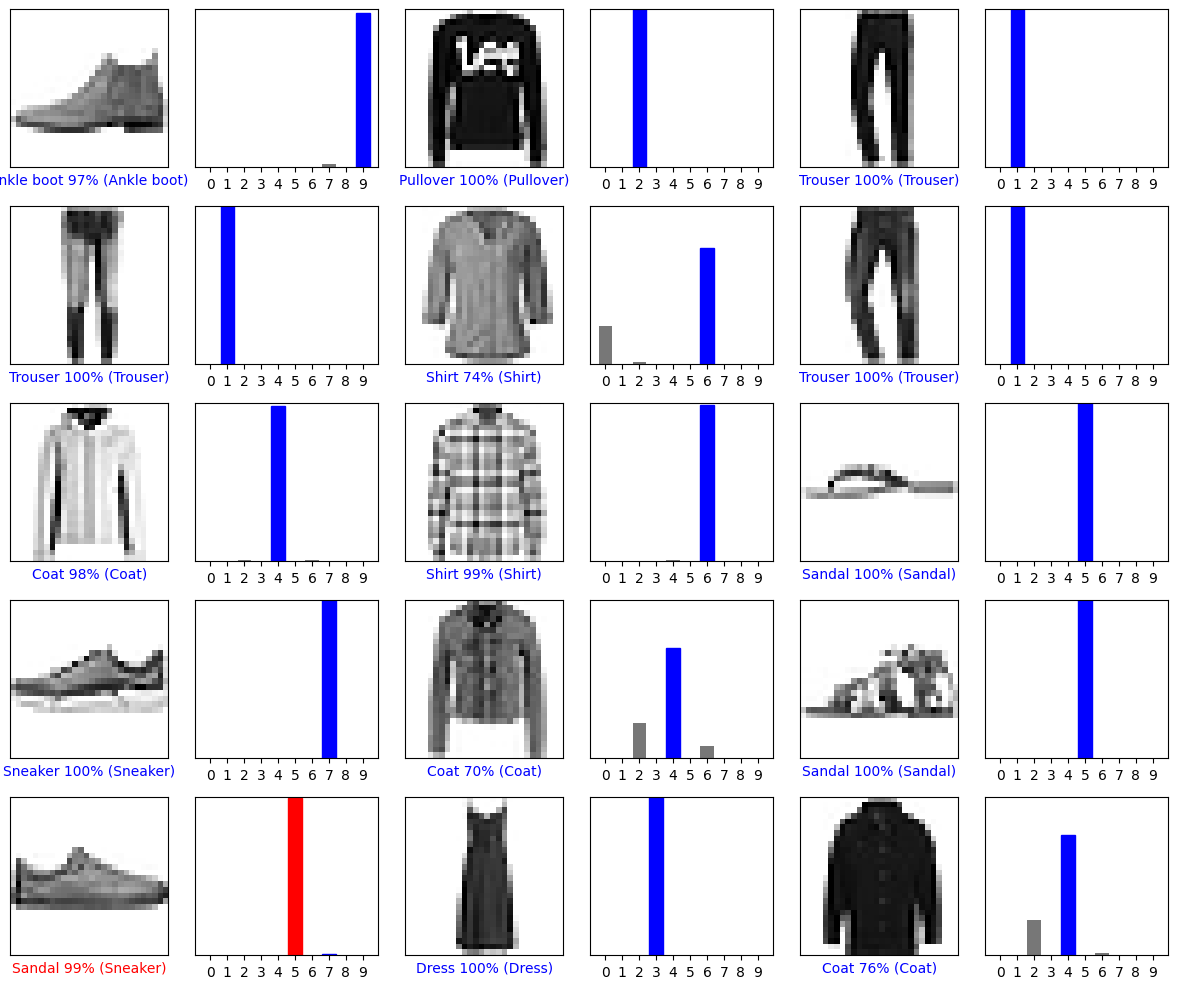

In [13]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [14]:
img = test_images[1]

img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [15]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[4.7781708e-05 1.8115404e-13 9.9960262e-01 9.1869792e-09 1.4936137e-04
  1.3682384e-10 2.0024649e-04 3.9290116e-16 1.3633124e-10 1.1402999e-12]]


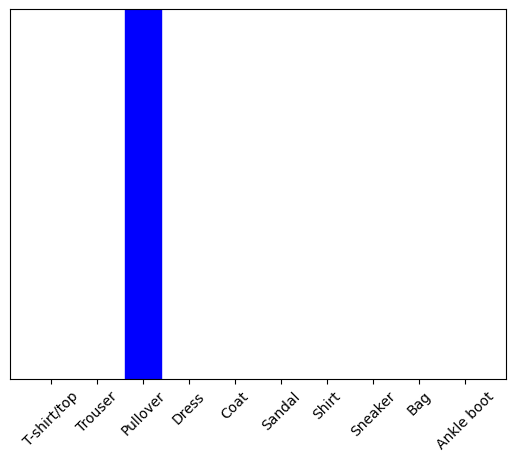

In [16]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [17]:
np.argmax(predictions_single[0])

2

In [8]:
#%load_ext tensorboard
#%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 1286), started 13 days, 22:47:23 ago. (Use '!kill 1286' to kill it.)

![1.png](1.png)

![2.png](2.png)